# 価値反復法

今日は[森村(2019)](https://www.amazon.co.jp/%E5%BC%B7%E5%8C%96%E5%AD%A6%E7%BF%92-%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%83%97%E3%83%AD%E3%83%95%E3%82%A7%E3%83%83%E3%82%B7%E3%83%A7%E3%83%8A%E3%83%AB%E3%82%B7%E3%83%AA%E3%83%BC%E3%82%BA-%E6%A3%AE%E6%9D%91-%E5%93%B2%E9%83%8E/dp/4065155916/ref=sr_1_3?adgrpid=81262430850&gclid=Cj0KCQjwk7ugBhDIARIsAGuvgPYqZnWcQryNTVWKDJT8whZNJ-h73ZqHT6qF2I9bXprKne2GkLHavEIaArExEALw_wcB&hvadid=649107616291&hvdev=c&hvlocphy=1009180&hvnetw=g&hvqmt=e&hvrand=10477133917986279598&hvtargid=kwd-898864963330&hydadcr=15817_13644392&jp-ad-ap=0&keywords=%E5%BC%B7%E5%8C%96%E5%AD%A6%E7%BF%92+%E6%A3%AE%E6%9D%91&qid=1678699533&sr=8-3)の本のp.56に書いてある価値反復法のコードを書いていきたいと思います．


価値反復法とは動的計画法による解法の一種です．

簡潔に説明するならば，ベルマン最適作用素を状態関数に繰り返し適用することで，最適な価値関数になるということです．これについては[森村(2019)](https://www.amazon.co.jp/%E5%BC%B7%E5%8C%96%E5%AD%A6%E7%BF%92-%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%83%97%E3%83%AD%E3%83%95%E3%82%A7%E3%83%83%E3%82%B7%E3%83%A7%E3%83%8A%E3%83%AB%E3%82%B7%E3%83%AA%E3%83%BC%E3%82%BA-%E6%A3%AE%E6%9D%91-%E5%93%B2%E9%83%8E/dp/4065155916/ref=sr_1_3?adgrpid=81262430850&gclid=Cj0KCQjwk7ugBhDIARIsAGuvgPYqZnWcQryNTVWKDJT8whZNJ-h73ZqHT6qF2I9bXprKne2GkLHavEIaArExEALw_wcB&hvadid=649107616291&hvdev=c&hvlocphy=1009180&hvnetw=g&hvqmt=e&hvrand=10477133917986279598&hvtargid=kwd-898864963330&hydadcr=15817_13644392&jp-ad-ap=0&keywords=%E5%BC%B7%E5%8C%96%E5%AD%A6%E7%BF%92+%E6%A3%AE%E6%9D%91&qid=1678699533&sr=8-3)の命題2.3(p.48)に動的計画法の収束性が書いてあります．

---

ここから価値反復法のアルゴリズムについて説明していきます．

最適方策を$\pi^*$, 最適価値関数を $V^*$ とし，$S,A,p,g,\gamma$ をそれぞれ状態の数，行動の数，遷移確率，報酬関数，割引率とします．

そして価値反復法では学習を終了する条件として更新前の価値関数と更新後の価値観数の差の $\max$ が $\epsilon$ だけ小さくなったら終了するようなものなっています．$\epsilon\in(0,\infty)$.

1. 価値関数 $V$ を初期化
2. 価値観数の更新
$$
V^{'} := \max_{a\in A}[ g(s,a) + \gamma \sum_{s^{'}\in S} p(s^{'}|s,a) v(s^{'}) ]$$
3. 終了判定 $\max_{s \in S}|V(s) - V^{'}(s)| < \epsilon$ なら, 最適方策
$$
\pi^* := \argmax_{a\in A}[ g(s,a) + \gamma \sum_{s^{'}\in S} p(s^{'}|s,a) v(s^{'}) ]
$$
を求めて終了．終了条件に当てはまらない場合は2から繰り返し．


---

コードを書いていきます．

In [1]:
import numpy as np
from typing import NamedTuple

S = 5 #state_size
A = 3  #action_size
S_array = np.arange(S) #state_set
A_array = np.arange(A) #action_set
gamma = 0.99 

rew = np.random.rand(S,A) * 10 #報酬

P = np.random.rand(S*A, S) #遷移確率
P = P / np.sum(P,axis=-1,keepdims=True)
P = P.reshape(S,A,S)
np.testing.assert_almost_equal(P.sum(axis=-1),1) #確率1になっているか確認

# MDPの定義

class MDP(NamedTuple):
    S_array : np.array
    A_array : np.array
    gamma : float
    rew : np.array
    P : np.array

    @property
    def S(self) -> int:
        return len(self.S_array)

    @property
    def A(self) -> int:
        return len(self.A_array)

mdp = MDP(S_array,A_array,gamma,rew,P)
print(mdp.rew.shape)
print(mdp.P.shape)

(5, 3)
(5, 3, 5)


In [21]:
import jax
import jax.numpy as jnp

@jax.jit
def value_iteration(mdp:MDP, v:jnp.ndarray):
    S,A = mdp.S,mdp.A
    v = v.max(axis = -1)
    v_dash = mdp.rew + mdp.gamma * mdp.P @ v

    max_action = jnp.zeros((S,A))
    max_action = max_action.at[np.arange(S),v_dash.argmax(axis=1)].set(1)
    return max_action * v_dash



  4%|▍         | 433/10000 [00:00<00:01, 6016.88it/s]


Text(0.5, 0, 'iteration')

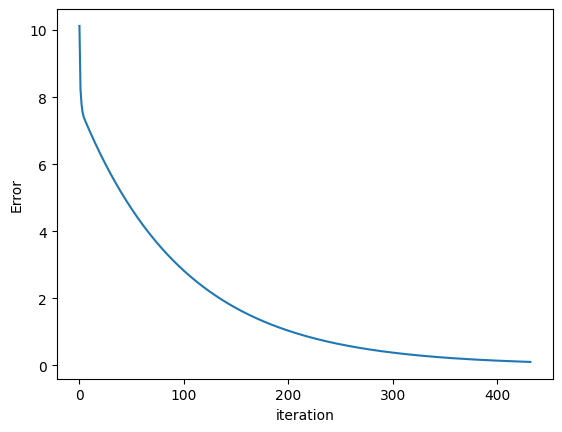

In [26]:
import matplotlib.pyplot as plt
from tqdm import tqdm

key = jax.random.PRNGKey(0)
S,A = mdp.S , mdp.A
iteration = 10000
errors = []
epsilon = 0.1 #閾値
v_before = jax.random.uniform(key,shape=[S,A])

for i in tqdm(range(iteration)):
    v_after = value_iteration(mdp,v_before)

    error = np.abs(v_after-v_before).max()
    #終了条件

    if error < epsilon:
        break

    errors.append(error)
    # v_afterとv_beforeの型は(5,3)になっているがmax_actionをとっているので，ある一列以外の値は0に抑えられている．
    v_before = v_after
    
plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('iteration')



更新前と更新後の価値関数の差によって終了していることがわかりますね．
そして，教科書に書かれているのですが，最適価値関数と推定価値関数は終了条件の $\epsilon$ によって抑えられることがわかっています．